# Multiple Linear regression model of Beijing PM2.5

Machine Learning <br>
Chris Xu <br>
Data Source: https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

import:

In [64]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, preprocessing
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import numpy.polynomial.polynomial as poly
%matplotlib inline

Preprocessing data

In [2]:
#names = ['NO.', 'year', 'month', 'day', 'hour', 'pm2.5', 'DEWP',
# 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv')
# out of 43824 samples, there are 2067 missing pm2.5 values
df = df.dropna()
print(df.head(6))
# shuffle the data
df = df.sample(frac=1)
print(df.head(6))

    No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd   Iws  Is  Ir
24  25  2010      1    2     0  129.0   -16  -4.0  1020.0   SE  1.79   0   0
25  26  2010      1    2     1  148.0   -15  -4.0  1020.0   SE  2.68   0   0
26  27  2010      1    2     2  159.0   -11  -5.0  1021.0   SE  3.57   0   0
27  28  2010      1    2     3  181.0    -7  -5.0  1022.0   SE  5.36   1   0
28  29  2010      1    2     4  138.0    -7  -5.0  1022.0   SE  6.25   2   0
29  30  2010      1    2     5  109.0    -7  -6.0  1022.0   SE  7.14   3   0
          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  \
28758  28759  2013      4   13     6  101.0     2   5.0  1002.0   NW   1.79   
13180  13181  2011      7    4     4   74.0    20  23.0  1004.0   NW   0.89   
3367    3368  2010      5   21     7  105.0    12  20.0  1008.0   cv   2.23   
33676  33677  2013     11    4     4   27.0    -2   3.0  1029.0   NW   1.79   
5174    5175  2010      8    4    14   69.0    22  24.0  1004.0   

In [4]:
#only take one sample a day in order to get rid of repeated data
df1 = df[df.hour == 12]
print(df1.head(6))
y = np.array(df1['pm2.5'])
x = np.array(df1[['TEMP','PRES', 'Iws']])

print(y.shape)
n = y.shape[0]
#y = y.reshape(n,1)
print(y.shape)

#a = np.ones((n,1))
#x = np.hstack((a,x))
print(x)
df.isnull().sum()




          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  \
924      925  2010      2    8    12  169.0    -5   0.0  1019.0   cv   2.68   
18516  18517  2012      2   11    12   73.0   -22   3.0  1028.0   NE   7.15   
38004  38005  2014      5    3    12  121.0     1  24.0  1007.0   SE  16.10   
40164  40165  2014      8    1    12  123.0    22  31.0  1007.0   cv   1.79   
35124  35125  2014      1    3    12   25.0   -16   8.0  1023.0   NW  20.56   
33756  33757  2013     11    7    12   24.0   -14  14.0  1021.0   SE   4.02   

       Is  Ir  
924     0   0  
18516   0   0  
38004   0   0  
40164   0   0  
35124   0   0  
33756   0   0  
(1731,)
(1731,)
[[   0.   1019.      2.68]
 [   3.   1028.      7.15]
 [  24.   1007.     16.1 ]
 ...
 [  26.   1016.      2.68]
 [  26.   1005.      4.92]
 [  -2.   1025.     74.2 ]]


No       0
year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

divide data to training and testing

In [5]:
x_tr = x[0:1300]
y_tr = y[0:1300]
x_val = x[1300:-1]
y_val = y[1300:-1]
print(x_tr.shape)

(1300, 3)


Using simple linear regression<br>


In [9]:
regr = linear_model.LinearRegression()
regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
print(y_tr_pred)

The intercept w0 =  3858.5620861937523
The coefficients w[1..d]= [-3.27626595 -3.64660816 -0.43674468]
[141.49789048  96.89737042 100.76569196 ... 128.87125436  78.87849515
  68.52127336]


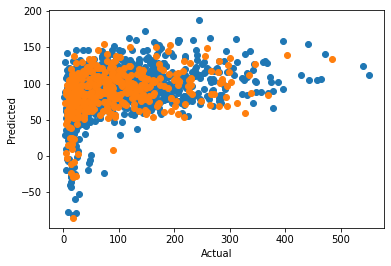

In [10]:
plt.scatter(y_tr,y_tr_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

data standardization and normalization

The intercept w0 =  77.82230359325092
The coefficients w[1..d]= [-10.01164472   6.01846591 -56.14723858]
[104.46368327 103.75674841  79.46218342 ... 102.45758776 124.30661706
  85.27003521]
cost: 3224.438427915589 



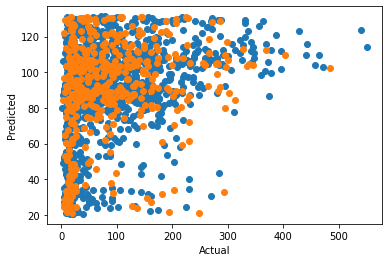

In [39]:
x = preprocessing.normalize(x, norm='l2')
#x = preprocessing.scale(x)
x_tr = x[0:1300]
y_tr = y[0:1300]
x_val = x[1300:-1]
y_val = y[1300:-1]

regr = linear_model.LinearRegression()
regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
print(y_tr_pred)

cost = np.sum((regr.intercept_ + x.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


[-0.94167435  0.174244   -0.28790355  0.88675058 -0.1640811   0.27111138
  0.03036097 -0.05016547  0.08288845]
The intercept w0 =  -2130341660258310.0
The coefficients w[1..d]= [-9.06669315e+00 -1.92932119e+01 -7.23715697e+01  2.13034166e+15
  3.55569620e+01  3.96942159e+01  2.13034166e+15  6.13281296e+01
  2.13034166e+15]
cost: 3176.8248303004043 



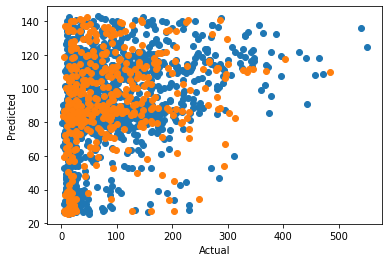

In [62]:
x = preprocessing.normalize(x, norm='l2')
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_trans = transformer.transform(x)
#x = preprocessing.scale(x)
x_tr = x_trans[0:1300]
y_tr = y[0:1300]
x_val = x_trans[1300:-1]
y_val = y[1300:-1]
print(x_tr[0])
regr = linear_model.LinearRegression()
regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
func = regr.intercept_ + x_trans.dot(regr.coef_)
cost = np.sum((regr.intercept_ + x_trans.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()


[-1.          0.18503637 -0.30573579  1.         -0.18503637  0.30573579
  0.03423846 -0.05657224  0.09347437]
The intercept w0 =  74.9777838172046
The coefficients w[1..d]= [ -8.2390189  -18.68817982 -59.1409915    4.86560884  20.94984371
  23.51296543   5.15262958  43.5710912   25.73065015]
cost: 3189.68869372581 



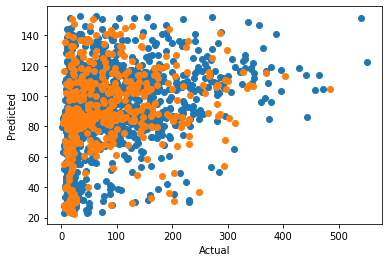

In [60]:
x = preprocessing.normalize(x, norm='max')
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_trans = transformer.transform(x)
x_tr = x_trans[0:1300]
y_tr = y[0:1300]
x_val = x_trans[1300:-1]
y_val = y[1300:-1]
print(x_tr[0])

regr = Ridge(alpha=1)
regr.fit(x_tr, y_tr)

#regr = linear_model.LinearRegression()
#regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
func = regr.intercept_ + x_trans.dot(regr.coef_)
cost = np.sum((regr.intercept_ + x_trans.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

[-1.          0.18503637 -0.30573579  1.         -0.18503637  0.30573579
  0.03423846 -0.05657224  0.09347437]
The intercept w0 =  80.7329287105029
The coefficients w[1..d]= [ -4.23422886   0.         -42.1748845    0.          -0.
  11.75117232  -0.           0.           0.        ]
cost: 3211.545837990645 



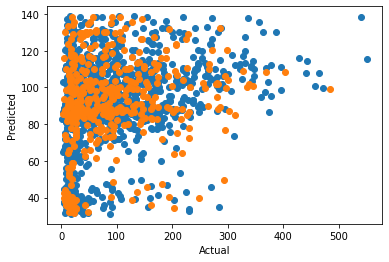

In [65]:
x = preprocessing.normalize(x, norm='max')
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_trans = transformer.transform(x)
x_tr = x_trans[0:1300]
y_tr = y[0:1300]
x_val = x_trans[1300:-1]
y_val = y[1300:-1]
print(x_tr[0])

regr = Lasso(alpha=1)
regr.fit(x_tr, y_tr)

#regr = linear_model.LinearRegression()
#regr.fit(x_tr,y_tr)
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
y_tr_pred = regr.predict(x_tr)
y_val_pred = regr.predict(x_val)
func = regr.intercept_ + x_trans.dot(regr.coef_)
cost = np.sum((regr.intercept_ + x_trans.dot(regr.coef_) - y)**2)/n/2
print("cost: {} \n".format(cost))
plt.scatter(y_tr,y_tr_pred)

plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

plt.scatter(y_val,y_val_pred)
plt.plot()
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

